In [211]:
import os
import sys
import pandas as pd
import numpy as np
import json
from glob import glob

import requests
import xmltodict
import random


import re
import time

from google_images_download import google_images_download as gim

from IPython.display import Image


sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import warnings
warnings.filterwarnings('ignore')

# import dependencies
%matplotlib inline

In [2]:
import inputs

In [185]:
# os.path.dirname(os.path.dirname(os.getcwd()))
def extract_keyword(word):
    site = 'http://ngrams.ucd.ie/therex3/common-nouns/category.action?'
    args = ['cate=' + word +'%3Aanimal', 'xml=true']
    url = site + '&'.join(args)
    animals = []
    categories = []
    # print(url)
    
    res = requests.get(url)
    
    parsed = xmltodict.parse(res.content)
    
#     for c in parsed['ModifierData']['CategoryHeads']['CategoryHead']:
#         categories.append(c['#text'])
    
    for a in parsed['CategoryData']['Members']['Member']:
        animals.append(a['#text'])

    
    # print(result)
    
    return animals



def build_query(keywords, n=5):
    emotion = keywords[0]
    search_keys = []
    
    for pair in keywords[1]:
        if pair[0] == 'animal':
            animals = extract_keyword(pair[1])
            
            samples = random.choices(animals, k=n)
            # samples = random.choices(categories, k=n)
            
            search_keys += [(s, emotion + ' ' + pair[1] + ' ' + s) for s in samples]

    # select random key
    print(search_keys)
    
    # search_key = random.choice(search_list) + ' creature artwork'
    
    return emotion, search_keys
    
    

In [180]:
keywords = inputs.get_input()

In [181]:
keywords

('happiness',
 [('activity', 'meeting'),
  ('animal', 'hooved'),
  ('animal', 'unusual'),
  ('animal', 'mythical'),
  ('location', 'battlefield'),
  ('weather', 'typhoon'),
  ('human', 'barbaric'),
  ('human', 'deceptive'),
  ('human', 'ruthless'),
  ('human', 'compassionate'),
  ('human', 'evil'),
  ('human', 'brutal')])

In [186]:
emotion, search_keys = build_query(keywords, n=5)

[('hedgehog', 'happiness hooved hedgehog'), ('goat', 'happiness hooved goat'), ('giraffe', 'happiness hooved giraffe'), ('pig', 'happiness hooved pig'), ('serow', 'happiness hooved serow'), ('otter', 'happiness unusual otter'), ('marsupial', 'happiness unusual marsupial'), ('rabbit', 'happiness unusual rabbit'), ('alpaca', 'happiness unusual alpaca'), ('kangaroo', 'happiness unusual kangaroo'), ('hydra', 'happiness mythical hydra'), ('hydra', 'happiness mythical hydra'), ('pike', 'happiness mythical pike'), ('fairy', 'happiness mythical fairy'), ('celestial_deer', 'happiness mythical celestial_deer')]


In [187]:
animal, search_key = random.choice(search_keys)

In [191]:
search_key

'happiness hooved giraffe'

In [197]:
def get_images(search_key, output):
    response = gim.googleimagesdownload()
    image_dir = 'search'
    
    old_files = glob(os.path.join(output, image_dir, '*'))

    for f in old_files:
        os.remove(f)
    
    image_paths = response.download({
        'keywords': search_key + ' animal creature',
        'limit': 20,
        'format': 'jpg',
        'size': 'medium',
        'output_directory': output,
        'image_directory': image_dir,
        'language': 'English',
        'safe_search': True
    })
    
    return image_paths[search_key + ' animal creature']


In [198]:
images = get_images(search_key, '../images/')


Item no.: 1 --> Item name = happiness hooved giraffe animal creature
Evaluating...
Starting Download...
Completed Image ====> 1. 79bb617a20801ef3c9e1850c08fd954a.jpg
Completed Image ====> 2. 43c15a69153c44ef84b94db20b4b8da3.jpg
Completed Image ====> 3. b3bac5ef861b46966ef35252193b5bdc.jpg
Completed Image ====> 4. april%20face.jpg
Completed Image ====> 5. 19f3379f65ae1a8dca44f5cff85295a7.jpg
Completed Image ====> 6. Giraffe-Gives-Birth-fb-550x330.jpg
Completed Image ====> 7. b8f3440d3baa8977463f3278ab949c5b.jpg
Completed Image ====> 8. 9087c10af435cb5b2471afd88299a17e.jpg
Completed Image ====> 9. how-giraffes-wear-ties-fb__700-png.jpg
Completed Image ====> 10. 0c56693b5d534df9b176400412cae6ed.jpg
Completed Image ====> 11. happy-giraffe-illustration-450w-10943983.jpg
Completed Image ====> 12. 800px_COLOURBOX36292531.jpg
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====> 13. giraffeA.jpg
Completed Image ====> 14. e5f099fd92b566b75ab539b76d2ae

In [209]:
image = random.choice(images)

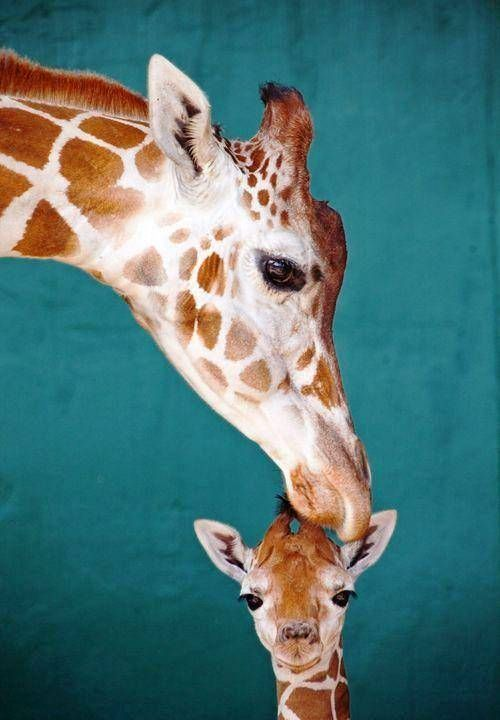

In [210]:
Image(image)